<a href="https://colab.research.google.com/github/GagraniV/WiDS2023/blob/main/VJ_WiDS_Feb072023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pytorch-tabnet
#!pip install wget
#!pip install wandb
#import wandb
#!pip install optuna
#from pytorch_tabnet.tab_model import TabNetRegressor
#import optuna
#from optuna import Trial, visualization
#import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.5 MB/s eta 0:00:00


In [26]:
import numpy as np 
import pandas as pd 
from random import random
import csv
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('ggplot')
import seaborn as sns
from datetime import datetime
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Download complete and/or subset of the dataset. 
Upload dataset https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7


In [3]:
from google.colab import drive
drive.mount('/content/drive')
#to unmount
#drive.flush_and_unmount()
#Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Mounted at /content/drive


In [43]:
drive.flush_and_unmount()

In [ ]:
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv')
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv')

In [ ]:
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv',nrows =1000)
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv',nrows =1000)

In [27]:
np.random.seed(222)
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv', skiprows=lambda x: x > 0 and random() >=0.05)
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv', skiprows=lambda x: x > 0 and random() >=0.05)

In [ ]:
with open('/content/drive/MyDrive/Kaggle2023/train_data.csv', 'r') as fin:
    reader = csv.reader(fin)
    rows = [l for l in reader if random() >= 0.99]
    trn_df = pd.DataFrame(rows)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
%cd drive/MyDrive/Kaggle2023
#trn_df= pd.read_csv('train_data.csv')

/content/drive/MyDrive/Kaggle2023


In [5]:
display(trn_df.head(n=5).style.set_caption('Train data'))

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

North American Multi-Model Ensemble (NMME): The North American Multi-Model Ensemble (NMME) is a collection of physics-based forecast models from various modeling centers in North America. Forecasts issued monthly from the Cansips, CanCM3, CanCM4, CCSM3, CCSM4, GFDL-CM2.1-aer04, GFDL-CM2.5, FLOR-A06 and FLOR-B01, NASA-GMAO-062012, and NCEP-CFSv2 models were downloaded from the IRI/LDEO Climate Data Library. Each forecast contains monthly mean predictions from 0.5 to 8.5 months ahead.

In [41]:
trn_df.filter(regex='^nmme',axis=1).head()

,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,nmme0mean
0,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,27.83,29.34,27.57,27.98,27.30,28.27,28.42,28.30,28.55,28.17,25.33,17.55,13.59,25.28,38.05,18.06,23.20,38.59,16.50,24.02,35.64,17.54,5.19,16.93,23.16,3.28,3.06,8.41,14.53,14.19,35.64,17.54,5.19,16.93,23.16,3.28,3.06,8.41,14.53,14.19,25.33,17.55,13.59,25.28,38.05,18.06,23.20,38.59,16.50,24.02,27.83,29.34,27.57,27.98,27.30,28.27,28.42,28.30,28.55,28.17,30.46
1,26.87,27.15,28.18,27.88,27.03,29.48,29.87,28.76,28.30,28.17,20.99,24.64,23.24,23.31,22.99,21.63,22.66,22.49,25.26,23.02,30.09,14.13,9.02,20.92,31.36,30.17,29.51,23.60,27.54,24.04,47.10,40.91,7.09,40.21,39.89,22.82,7.50,14.14,28.01,27.52,47.10,40.91,7.09,40.21,39.89,22.82,7.50,14.14,28.01,27.52,30.09,14.13,9.02,20.92,31.36,30.17,29.51,23.60,27.54,24.04,20.99,24.64,23.24,23.31,22.99,21.63,22.66,22.49,25.26,23.02,28.17
2,22.82,26.38,23.98,25.98,22.77,24.63,23.83,19.61,23.81,23.76,18.55,22.37,20.25,20.10,20.33,18.45,18.79,19.15,21.92,19.99,16.48,8.62,17.97,14.58,28.36,31.96,15.26,18.81,26.95,19.89,47.10,40.91,7.09,40.21,39.89,22.82,7.50,14.14,28.01,27.52,18.20,7.40,13.27,14.09,25.70,13.03,19.43,43.10,27.60,20.20,22.42,14.31,11.65,22.20,28.32,25.51,31.84,18.52,35.52,23.37,18.93,23.02,18.92,21.36,19.43,17.31,20.48,19.92,21.37,20.08,28.17
3,22.82,26.38,23.98,25.98,22.77,24.63,23.83,19.61,23.81,23.76,16.72,20.66,18.00,17.69,18.33,16.07,15.89,16.65,19.42,17.72,15.53,9.30,20.57,14.86,29.84,25.78,16.49,18.47,26.59,19.71,47.10,40.91,7.09,40.21,39.89,22.82,7.50,14.14,28.01,27.52,18.20,7.40,13.27,14.09,25.70,13.03,19.43,43.10,27.60,20.20,16.66,14.45,13.62,23.17,26.04,22.01,33.58,14.71,41.50,22.86,16.78,21.15,16.11,18.79,17.58,16.03,18.17,17.75,20.01,18.04,28.17
4,22.82,26.38,23.98,25.98,22.77,24.63,23.83,19.61,23.81,23.76,16.04,20.19,15.22,18.07,16.95,15.26,17.37,17.12,19.20,17.27,15.91,11.43,26.93,15.90,35.08,25.60,17.12,19.98,25.27,21.47,18.20,7.40,13.27,14.09,25.70,13.03,19.43,43.10,27.60,20.20,18.20,7.40,13.27,14.09,25.70,13.03,19.43,43.10,27.60,20.20,15.72,10.36,23.75,15.38,32.46,25.69,16.81,19.22,25.93,20.59,15.31,19.23,14.32,17.35,16.33,14.48,16.57,16.49,18.39,16.50,23.76


In [ ]:
trn_df.filter(regex='^contest',axis=1).head()

,contest-pevpr-sfc-gauss-14d__pevpr,contest-wind-h10-14d__wind-hgt-10,contest-rhum-sig995-14d__rhum,contest-wind-h100-14d__wind-hgt-100,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500
0,232.52,31147.63,80.40,16621.35,26.414309,101330.27,1.82,98603.93,13.84,35.35,-4.10,47.77,1526.75,-3.20,5877.00
1,296.27,31089.40,70.52,16593.67,25.880598,101376.16,3.92,98642.46,12.78,26.47,-4.38,12.04,1529.62,-2.21,5880.70
2,203.79,31014.63,77.34,16564.07,24.003215,101653.56,1.21,98936.60,17.03,28.22,-3.15,19.03,1542.43,-4.06,5868.49
3,207.04,30981.00,77.51,16536.94,20.826005,101811.91,1.74,99068.87,25.45,28.72,-2.36,62.82,1546.07,-3.37,5856.56
4,200.77,30937.28,71.94,16466.38,14.335842,101998.37,1.28,99218.89,32.15,21.39,7.48,0.63,1532.88,-1.25,5818.76


In [ ]:
#file containing most recent monthly temprature NMME model forecasts for tmp2m 
trn_df.filter(regex = '^nmme0-tmp2m',axis=1).head(n =6)

,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean
0,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
1,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
2,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
3,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
4,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
5,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46


In [ ]:
trn_df.filter(regex = '^cancm30',axis=1).head(n =6)

,cancm30
0,29.02
1,29.02
2,26.87
3,26.87
4,22.82
5,22.82


In [ ]:
print('Column count is: ', len(trn_df.columns))

Column count is:  246


In [ ]:
print('Row count is:', len(trn_df))

Row count is: 18890


In [6]:
print('train rows and column: ', trn_df.shape)
print('test rows and column: ', tst_df.shape)

train rows and column:  (18922, 246)
test rows and column:  (1583, 245)


In [ ]:
trn_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

In [ ]:
tst_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=245)

In [ ]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18652 entries, 0 to 18651
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 35.0+ MB


https://www.kaggle.com/competitions/widsdatathon2023/data

In [ ]:
trn_df.dtypes

index                                         int64
lat                                         float64
lon                                         float64
startdate                                    object
contest-pevpr-sfc-gauss-14d__pevpr          float64
nmme0-tmp2m-34w__cancm30                    float64
nmme0-tmp2m-34w__cancm40                    float64
nmme0-tmp2m-34w__ccsm30                     float64
nmme0-tmp2m-34w__ccsm40                     float64
nmme0-tmp2m-34w__cfsv20                     float64
nmme0-tmp2m-34w__gfdlflora0                 float64
nmme0-tmp2m-34w__gfdlflorb0                 float64
nmme0-tmp2m-34w__gfdl0                      float64
nmme0-tmp2m-34w__nasa0                      float64
nmme0-tmp2m-34w__nmme0mean                  float64
contest-wind-h10-14d__wind-hgt-10           float64
nmme-tmp2m-56w__cancm3                      float64
nmme-tmp2m-56w__cancm4                      float64
nmme-tmp2m-56w__ccsm3                       float64
nmme-tmp2m-5

In [ ]:
tst_df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,...,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,391410.500000,0.592766,0.517964,299.244395,19.363234,21.195801,19.204389,20.140415,18.261659,20.396613,...,22.030820,-34.379016,25.485902,36.913279,-21.290328,10.448689,-12.676885,8.211967,-11.478033,21.083770
std,9051.264507,0.251748,0.272063,117.029504,7.310349,7.151861,7.146665,6.169318,5.539982,7.087798,...,30.914333,24.479350,30.720523,17.083142,22.336810,8.557387,29.438632,29.897845,18.660838,16.841297
min,375734.000000,0.000000,0.000000,32.820000,1.550000,2.900000,1.170000,3.530000,1.840000,0.080000,...,-19.900000,-76.450000,-29.250000,6.500000,-59.540000,-5.450000,-66.770000,-32.150000,-53.690000,-16.560000
25%,383572.250000,0.409091,0.300000,215.962500,14.060000,16.140000,14.440000,15.840000,14.660000,15.540000,...,2.220000,-56.070000,3.630000,19.570000,-39.340000,4.720000,-30.630000,-18.360000,-23.150000,13.420000
50%,391410.500000,0.590909,0.533333,292.915000,19.940000,21.720000,19.325000,20.150000,18.210000,20.340000,...,14.700000,-31.070000,22.740000,37.090000,-21.420000,10.660000,-22.640000,0.150000,-13.950000,21.090000
75%,399248.750000,0.818182,0.766667,371.330000,24.610000,26.810000,24.760000,24.890000,22.180000,25.730000,...,34.300000,-15.510000,44.690000,49.660000,-0.790000,17.090000,14.420000,28.840000,-0.470000,32.410000
max,407087.000000,1.000000,1.000000,740.170000,36.080000,36.030000,32.970000,33.910000,35.310000,37.420000,...,116.770000,25.330000,79.610000,71.270000,14.150000,29.000000,33.350000,74.130000,28.270000,51.450000


In [28]:
list(trn_df.select_dtypes(include='object'))

['startdate', 'climateregions__climateregion']

In [29]:
list(trn_df.select_dtypes(include='int64'))

['index', 'mjo1d__phase', 'mei__meirank', 'mei__nip']

In [30]:
trn_df.columns.to_series().groupby(trn_df.dtypes).count()

int64        4
float64    240
object       2
dtype: int64

In [31]:
#Object type columns 
trn_df.groupby(['climateregions__climateregion'])['startdate'].count().reset_index()


,climateregions__climateregion,startdate
0,BSh,271
1,BSk,6852
2,BWh,500
3,BWk,679
4,Cfa,2610
5,Cfb,227
6,Csa,447
7,Csb,2040
8,Dfa,1092
9,Dfb,2611


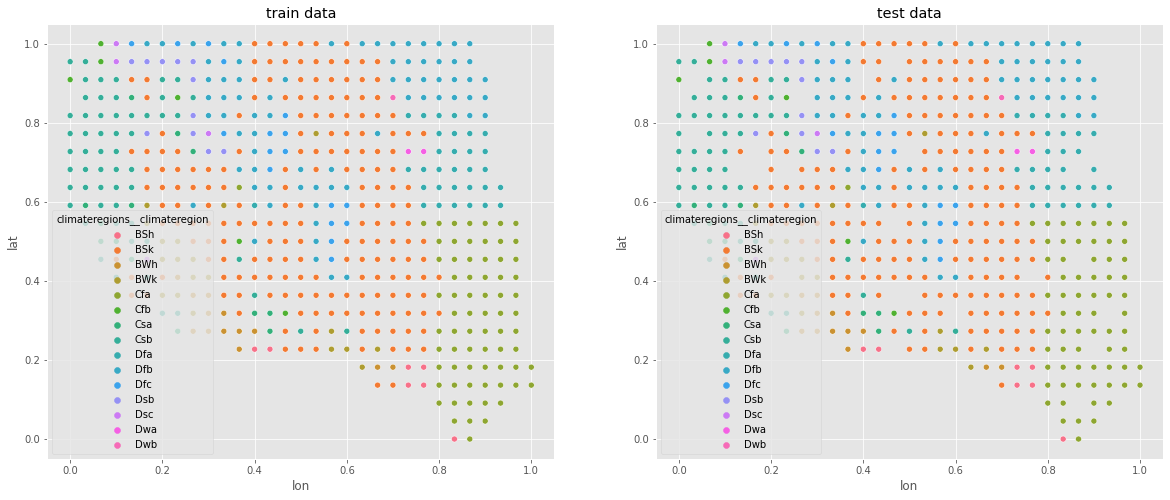

In [32]:
temp = trn_df.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame().reset_index(drop=False)
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[0])
ax[0].set_title('train data')
temp = tst_df.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame().reset_index(drop=False)
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[1])
ax[1].set_title('test data')
plt.show()

Location Feature and issue WiDS 2023: link text different locations train/test SOLVED and found that this issue is caused due to rounding differences between training and test data.

In [ ]:
# check unique locations provided in the dataset

unique_trn_loc = trn_df.groupby(['lat', 'lon']).size().rename('count').reset_index()
unique_trn_loc.head()

len(unique_trn_loc)


In [ ]:
unique_tst_loc = tst_df.groupby(['lat', 'lon']).size().rename('count').reset_index()
unique_tst_loc.head()

len(unique_tst_loc)

In [33]:
#Let's create a location feature from the lat/lon coordinates.
# Concatenate train and test data
all_df = pd.concat([trn_df, tst_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
#display(all_df)

#print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
trn_df = all_df.iloc[:len(trn_df)]
tst_df = all_df.iloc[len(trn_df):]

In [ ]:
# scale = 14

# trn_df.loc[:,'lat']=round(trn_df.lat,scale)
# trn_df.loc[:,'lon']=round(trn_df.lon,scale)

# tst_df.loc[:,'lat']=round(tst_df.lat,scale)
# tst_df.loc[:,'lon']=round(tst_df.lon,scale)

# # Concatenate train and test data
# all_df = pd.concat([trn_df, tst_df], axis=0)

# # Create new feature
# all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()

# # Split back up
# trn_df = all_df.iloc[:len(trn_df)]
# tst_df = all_df.iloc[len(trn_df):]

# print('Locations in train that are not in test')
# print([c for c in trn_df.loc_group.unique() if c not in tst_df.loc_group.unique()])

# print('Locations in test that are not in train')
# print([c for c in tst_df.loc_group.unique() if c not in trn_df.loc_group.unique()])

In [34]:
#all_df.groupby(['loc_group'])['lat'].count()
all_df.loc_group.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 168, 169, 170, 171, 172,
       173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 22

In [35]:
#convert into pandas datetime object
trn_df.startdate = pd.to_datetime(trn_df.startdate)
tst_df.startdate = pd.to_datetime(tst_df.startdate)
trn_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [36]:
# StartDate
print(min(trn_df.startdate), max(trn_df.startdate))

2014-09-01 00:00:00 2016-08-31 00:00:00


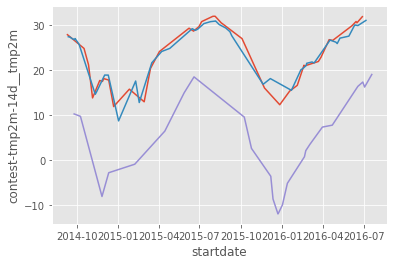

In [37]:
temp = trn_df[trn_df.loc_group == 0]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')
temp = trn_df[trn_df.loc_group == 1]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')

temp = trn_df[trn_df.loc_group == 556]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')

In [ ]:
trn_df.describe().style.background_gradient(cmap="Pastel1")

In [38]:
missing_columns = [col for col in trn_df.columns if trn_df[col].isnull().any()]
missingvalues_count =trn_df.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df.style.background_gradient(cmap="Pastel1")

,Null Values Count
nmme0-tmp2m-34w__ccsm30,822
nmme-tmp2m-56w__ccsm3,562
nmme-prate-34w__ccsm3,458
nmme0-prate-56w__ccsm30,797
nmme0-prate-34w__ccsm30,822
nmme-prate-56w__ccsm3,562
nmme-tmp2m-34w__ccsm3,458
ccsm30,797


In [13]:
trn_df = trn_df.dropna()

In [ ]:
#group start_date by month and check averages of the other columns
#trn_df.groupby(pd.Grouper(key='startdate',freq='M')).mean()

contest-tmp2m-14d__tmp2m, the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, is provided

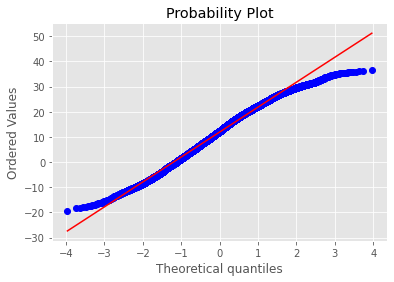

In [39]:
res = stats.probplot(trn_df['contest-tmp2m-14d__tmp2m'], plot=plt)

Feature Engineering

In [40]:
trn_df['year']=pd.DatetimeIndex(trn_df['startdate']).year 
trn_df['month']=pd.DatetimeIndex(trn_df['startdate']).month 
trn_df['day']=pd.DatetimeIndex(trn_df['startdate']).day

tst_df['year']=pd.DatetimeIndex(tst_df['startdate']).year 
tst_df['month']=pd.DatetimeIndex(tst_df['startdate']).month 
tst_df['day']=pd.DatetimeIndex(tst_df['startdate']).day

# drop the startdate column from training and test dataset

trn_df=trn_df.drop(['startdate'], axis=1)
trn_df=trn_df.drop(['index'], axis=1)

tst_df=tst_df.drop(['startdate'], axis=1)
tst_df=tst_df.drop(['index'], axis=1)

In [ ]:
#dummy 0,1 encoding for climate categorical varible 
df = pd.get_dummies(df, columns=['climateregions__climateregion'])
df

In [ ]:
#feature importance
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8*(1-.8)))
selection.fit_transform(df)

In [ ]:
#lets look at one of the weather forecasts - looks good to me
fig = plt.figure(figsize=(10,4))
plt.scatter(dates, df['cancm30'])
plt.show()

In [ ]:
# data are cyclic
def add_cyclical_features(df, cols):
    for col in cols:
        df['sin_' + col] = np.sin(2 * np.pi * df[col]/max(df[col]))
        df['cos_' + col] = np.cos(2 * np.pi * df[col]/max(df[col]))
    return df

df_cyclical = add_cyclical_features(df, ['month', 'day', 'year'])

In [ ]:
ax = df.plot.scatter('sin_month', 'cos_month', title='Month Transformation').set_aspect('equal')
ax = df.plot.scatter('sin_day', 'cos_day', title='Day Transformation').set_aspect('equal')

In [ ]:
season_months = {
    'December': 'Winter',
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall'
}

first_letter_desc = {
    'B': 'Dry climates (arid and semi-arid)',
    'C': 'Moist middle latitudes with mild winters (humid subtropical)',
    'D': 'Moist middle latitudes with cold winters (humid continental)'
}

climate_region_codes = {
    'BSh': 'Arid and semi-arid climate region',
    'Cfa': 'Humid subtropical climate region with hot summers',
    'BSk': 'Arid climate region with cool winters',
    'BWk': 'Arid and semi-arid climate region with cool winters',
    'BWh': 'Arid and semi-arid climate region with hot deserts',
    'Csa': 'Mediterranean climate region',
    'Csb': 'Warm-summer Mediterranean climate region',
    'Cfb': 'Marine west coast climate region',
    'Dfb': 'Marine west coast climate region with warm summers',
    'Dsc': 'Subarctic climate region with long, cold winters',
    'Dfc': 'Subarctic climate region with long, cold winters and mild summers',
    'Dfa': 'Humid continental climate region with hot summers',
    'Dsb': 'Humid continental climate region with warm summers',
    'Dwa': 'Humid continental climate region with cold winters',
    'Dwb': 'Humid continental climate region with cold winters and warm summers'
}

In [ ]:
df['season'] = df['month'].map(season_months)
df['cilate_region_description'] = df['climateregions__climateregion'].map(climate_region_codes)
df['first_letter_desc'] = df['climateregions__climateregion'].str[0].map(first_letter_desc)

group_locats = {}
for idx, locat in enumerate(df['lat-lon'].unique()):
    group_locats[locat] = f'Group {idx}'
    
df['location'] = df['lat-lon'].map(group_locats)

In [ ]:
df.drop(features, axis=1, inplace=True)
df.head()

In [ ]:
msno.heatmap(missing_vals_df, cmap='YlGnBu')#Correlation heatmap


In [ ]:
# Calculate the IQR for each column
for column in fill_val_df.columns:
    Q1 = fill_val_df[column].quantile(0.25)
    Q3 = fill_val_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = fill_val_df[(fill_val_df[column] < Q1 - 1.5 * IQR) | (fill_val_df[column] > Q3 + 1.5 * IQR)].index
    
    # Print outliers for each column
    print("Outliers in column " + column + ":")
    #print(fill_val_df.loc[outliers, column])

In [ ]:
# Calculate the quartiles for each column
Q1 = fill_val_df.quantile(0.25)
Q3 = fill_val_df.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in each column
outlier_counts = ((fill_val_df < lower_bound) | (fill_val_df > upper_bound)).sum()

print(outlier_counts)

In [ ]:
#Calculate the relationship between all features

# Calculate the Pearson correlation coefficient between all features
corr = fill_val_df.corr(method='pearson')

# Print the correlation matrix
print(corr)

In [ ]:
#https://www.kaggle.com/code/shadowhat/join-live-predict-climate-in-wids
#https://www.kaggle.com/code/dshassan/wids-datathon-2023-time-series-forecasting

In [ ]:
#Replacing all missing values with mean of each column.
mask = train_data.isnull().any(axis=1)
cols_with_missing_vals = train_data.columns[train_data.isnull().any()]

fill_val_df = train_data.loc[mask, cols_with_missing_vals]

fill_val_df.fillna(fill_val_df.mean(), inplace=True)
fill_val_df.head()

In [ ]:
fill_val_df.isnull().any(axis=1).sum()